In [3]:
from sagemaker.amazon.amazon_estimator import get_image_uri 
from sagemaker.session import s3_input, Session
from sagemaker.inputs import TrainingInput
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
import sagemaker
from sagemaker.inputs import TrainingInput
import os

## EDA

Dataset Shape: (41188, 61)

First 5 Rows:


,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,1,999,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
1,57,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,37,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,40,1,999,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,56,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0



Column Names:
['age', 'campaign', 'pdays', 'previous', 'no_previous_contact', 'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'po

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.887346,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Target Variable Distribution:
y_yes
0    36548
1     4640
Name: count, dtype: int64


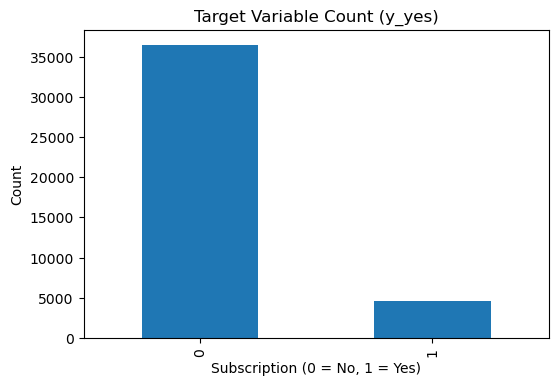

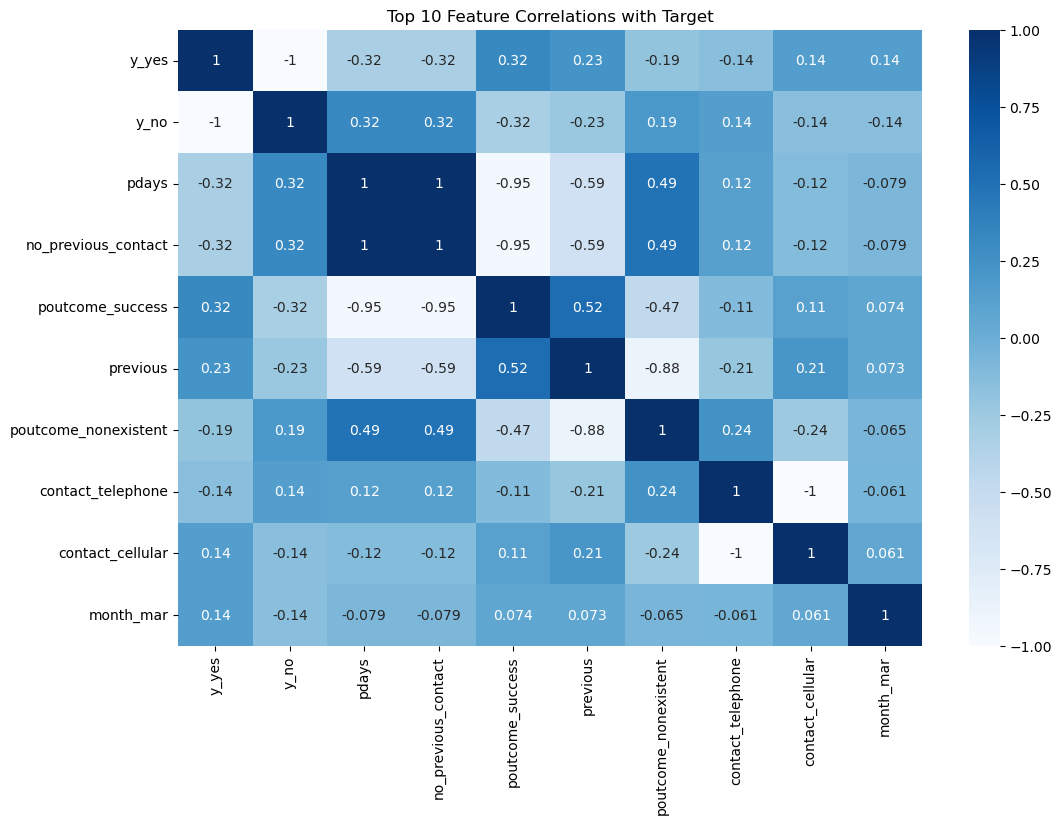

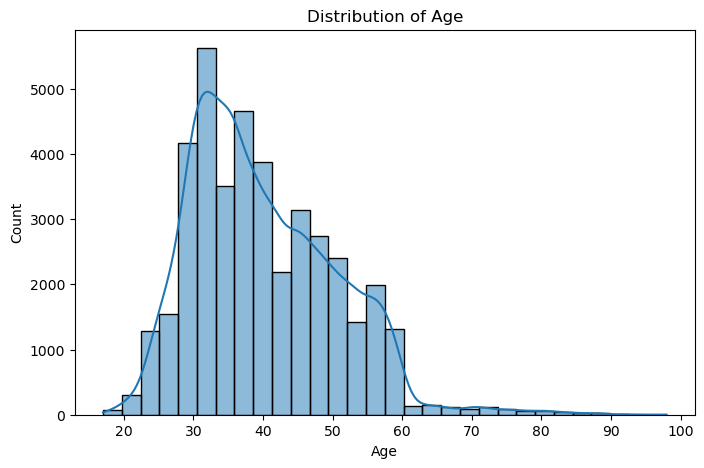

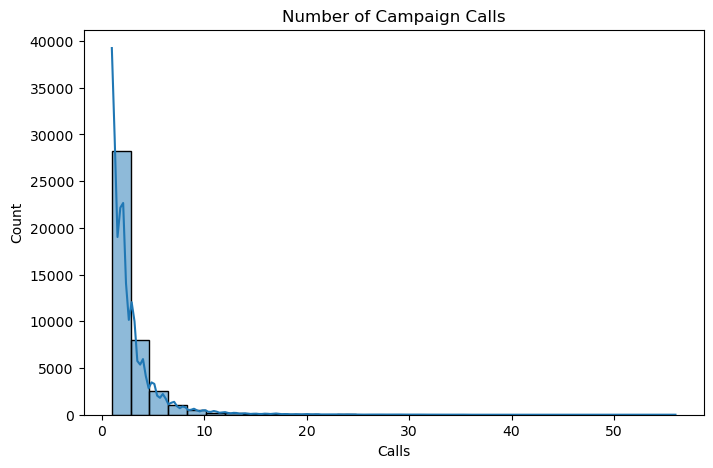

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


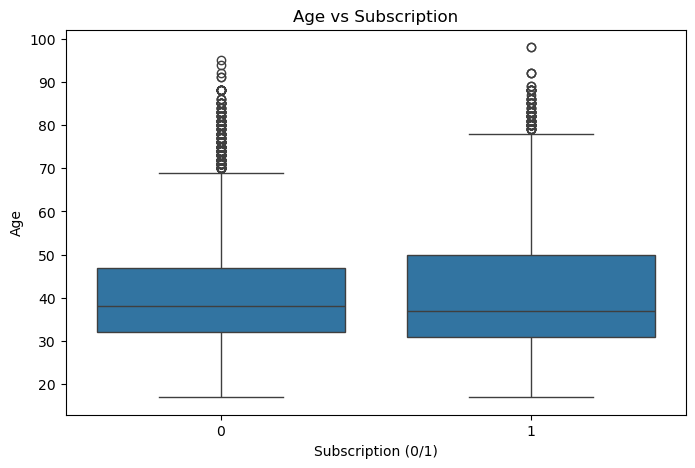

In [23]:
# Load dataset
df = pd.read_csv(r"bank_clean.csv", index_col=0)

# 1. Shape of the Dataset
print("Dataset Shape:", df.shape)

# 2. Preview first 5 rows
print("\nFirst 5 Rows:")
display(df.head())

# 3. Column Names
print("\nColumn Names:")
print(df.columns.tolist())

# 4. Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

print("\nTotal Missing Values:", df.isnull().sum().sum())

# 5. Basic Statistics
print("\nStatistical Summary:")
display(df.describe())

# 6. Target Variable Distribution
if "y_yes" in df.columns:
    print("\nTarget Variable Distribution:")
    print(df["y_yes"].value_counts())

    df["y_yes"].value_counts().plot(kind='bar', figsize=(6,4), title='Target Variable Count (y_yes)')
    plt.xlabel("Subscription (0 = No, 1 = Yes)")
    plt.ylabel("Count")
    plt.show()

# 7. Correlation Heatmap (Top 10 strongest correlations)
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
top_corr = corr["y_yes"].abs().sort_values(ascending=False).head(10).index
sns.heatmap(df[top_corr].corr(), annot=True, cmap="Blues")
plt.title("Top 10 Feature Correlations with Target")
plt.show()

# 8. Distribution of age
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

# 9. Campaign calls distribution
plt.figure(figsize=(8,5))
sns.histplot(df["campaign"], bins=30, kde=True)
plt.title("Number of Campaign Calls")
plt.xlabel("Calls")
plt.show()

# 10. Boxplot of age vs target
plt.figure(figsize=(8,5))
sns.boxplot(x=df["y_yes"], y=df["age"])
plt.title("Age vs Subscription")
plt.xlabel("Subscription (0/1)")
plt.ylabel("Age")
plt.show()


In [4]:
bucket_name = 'mybuckersagemaker' 
my_region = boto3.session.Session().region_name 
print(my_region)

us-east-1


In [5]:
try:
    s3 = boto3.client('s3', region_name=my_region)
    
    if my_region == 'us-east-1':
        print(f'Creating bucket {bucket_name} in region {my_region} without LocationConstraint.')
        s3.create_bucket(Bucket=bucket_name)
    else:
        print(f'Creating bucket {bucket_name} in region {my_region} with LocationConstraint {my_region}.')
        s3.create_bucket(
            Bucket=bucket_name,
            CreateBucketConfiguration={'LocationConstraint': my_region}
        )
    print('S3 bucket created successfully')
except Exception as e:
    print('S3 error: ', e)

Creating bucket mybuckersagemaker in region us-east-1 without LocationConstraint.
S3 bucket created successfully


In [6]:
# set an output path where the trained model will be saved
prefix = 'xgboost-as-a-built-in-algo'
output_path ='s3://{}/{}/output'.format(bucket_name, prefix)
print(output_path)

s3://mybuckersagemaker/xgboost-as-a-built-in-algo/output


## Downloading The Dataset And Storing in S3

In [7]:
import pandas as pd
import urllib
try:
    urllib.request.urlretrieve ("https://d1.awsstatic.com/tmt/build-train-deploy-machine-learning-model-sagemaker/bank_clean.27f01fbbdf43271788427f3682996ae29ceca05d.csv", "bank_clean.csv")
    print('Success: downloaded bank_clean.csv.')
except Exception as e:
    print('Data load error: ',e)

try:
    model_data = pd.read_csv('./bank_clean.csv',index_col=0)
    print('Success: Data loaded into dataframe.')
except Exception as e:
    print('Data load error: ',e)

Success: downloaded bank_clean.csv.
Success: Data loaded into dataframe.


import numpy as np
train_data, test_data = np.split(model_data.sample(frac=1, random_state=1729), [int(0.7 * len(model_data))])
print(train_data.shape, test_data.shape)

In [11]:
from sagemaker.inputs import TrainingInput
import pandas as pd
import boto3
import sagemaker
from sagemaker.inputs import TrainingInput
import os

# Save train data to CSV
pd.concat([train_data['y_yes'], train_data.drop(['y_no', 'y_yes'], axis=1)], axis=1).to_csv('train.csv', index=False, header=False)

# Upload CSV to S3
s3 = boto3.Session().resource('s3')
s3.Bucket(bucket_name).Object(os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')

# Create S3 input for SageMaker
s3_input_train = TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')
print("Done")

Done


## Building Models Xgboot- Inbuilt Algorithm

In [12]:
# Save test data to CSV
pd.concat([test_data['y_yes'], test_data.drop(['y_no', 'y_yes'], axis=1)], axis=1).to_csv('test.csv', index=False, header=False)

# Upload CSV to S3
s3 = boto3.Session().resource('s3')
s3.Bucket(bucket_name).Object(os.path.join(prefix, 'test/test.csv')).upload_file('test.csv')

# Create S3 input for SageMaker
s3_input_test = TrainingInput(s3_data='s3://{}/{}/test'.format(bucket_name, prefix), content_type='csv')
print("Done")

Done


In [13]:
container = get_image_uri(boto3.Session().region_name,
                          'xgboost', 
                          repo_version='1.0-1')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [14]:
# initialize hyperparameters
hyperparameters = {
        "max_depth":"5",
        "eta":"0.2",
        "gamma":"4",
        "min_child_weight":"6",
        "subsample":"0.7",
        "objective":"binary:logistic",
        "num_round":50
        }
print("Done")

Done


In [15]:
import sagemaker
from sagemaker.estimator import Estimator

# Construct a SageMaker estimator that calls the xgboost-container
estimator = Estimator(
    image_uri=container,  # Use image_uri instead of image_name
    hyperparameters=hyperparameters,
    role=sagemaker.get_execution_role(),
    instance_count=1,  # train_instance_count is now instance_count
    instance_type='ml.m5.2xlarge',  # train_instance_type is now instance_type
    volume_size=5,  # train_volume_size is now volume_size
    output_path=output_path,
    use_spot_instances=True,  # train_use_spot_instances is now use_spot_instances
    max_run=300,  # train_max_run is now max_run
    max_wait=600  # train_max_wait is now max_wait
)
print("Done")

Done


In [16]:
estimator.fit({'train': s3_input_train,'validation': s3_input_test})

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2025-11-22-05-51-12-372


2025-11-22 05:51:12 Starting - Starting the training job...
2025-11-22 05:51:32 Starting - Preparing the instances for training...
2025-11-22 05:52:12 Downloading - Downloading the training image......
2025-11-22 05:53:18 Training - Training image download completed. Training in progress.
2025-11-22 05:53:18 Uploading - Uploading generated training model.[2025-11-22 05:53:10.438 ip-10-2-81-20.ec2.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determ

## Deploy Machine Learning Model As Endpoints

In [17]:
xgb_predictor = estimator.deploy(initial_instance_count=1,instance_type='ml.m4.xlarge')

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2025-11-22-05-53-59-667
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2025-11-22-05-53-59-667
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2025-11-22-05-53-59-667


------!

## Prediction of the Test Data

In [18]:
from sagemaker.serializers import CSVSerializer
import numpy as np

# Load the data into an array
test_data_array = test_data.drop(['y_no', 'y_yes'], axis=1).values

# Set up the CSV serializer
xgb_predictor.content_type = 'text/csv'
xgb_predictor.serializer = CSVSerializer()

# Perform prediction
predictions = xgb_predictor.predict(test_data_array).decode('utf-8')

# Convert predictions to array
predictions_array = np.fromstring(predictions[1:], sep=',')
print(predictions_array.shape)

(12357,)


In [19]:
predictions_array

array([0.05214286, 0.05660191, 0.05096195, ..., 0.03436061, 0.02942475,
       0.03715819])

In [20]:
cm = pd.crosstab(index=test_data['y_yes'], columns=np.round(predictions_array), rownames=['Observed'], colnames=['Predicted'])
tn = cm.iloc[0,0]; fn = cm.iloc[1,0]; tp = cm.iloc[1,1]; fp = cm.iloc[0,1]; p = (tp+tn)/(tp+tn+fp+fn)*100
print("\n{0:<20}{1:<4.1f}%\n".format("Overall Classification Rate: ", p))
print("{0:<15}{1:<15}{2:>8}".format("Predicted", "No Purchase", "Purchase"))
print("Observed")
print("{0:<15}{1:<2.0f}% ({2:<}){3:>6.0f}% ({4:<})".format("No Purchase", tn/(tn+fn)*100,tn, fp/(tp+fp)*100, fp))
print("{0:<16}{1:<1.0f}% ({2:<}){3:>7.0f}% ({4:<}) \n".format("Purchase", fn/(tn+fn)*100,fn, tp/(tp+fp)*100, tp))


Overall Classification Rate: 89.7%

Predicted      No Purchase    Purchase
Observed
No Purchase    91% (10785)    34% (151)
Purchase        9% (1124)     66% (297) 



## Deleting The Endpoints

In [ ]:
#sagemaker.Session().delete_endpoint(xgb_predictor.endpoint)
#bucket_to_delete = boto3.resource('s3').Bucket(bucket_name)
#bucket_to_delete.objects.all().delete()